In [ ]:
import networkx as nx
from model import Model

model = Model()

In [ ]:
print(model.alpha)

In [27]:
print(model.alpha[0,350]) # this corresponds to the edge going from node zero to node 350

-6.96347005769e-05


In [13]:
import numpy as np
prout = np.array([0,1,2,3])

In [39]:
np.ones((1,3)).T

array([[1.],
       [1.],
       [1.]])

In [51]:
np.ones((1,3)) @ np.ones((1,3)).T

array([[3.]])

In [42]:
(model.alpha[0:3,0].T).*(np.ones((1,3)).T)

SyntaxError: invalid syntax (<ipython-input-42-a781510039f2>, line 1)

In [19]:
prout[0:]

array([0, 1, 2, 3])

In [70]:
(m.alpha.T @ m.y).shape

(517,)

In [80]:
(model.y * (model.beta.T @ (model.y - 1))) / model.y 

array([5.43244561e-04, 0.00000000e+00, 1.35656340e-01, 5.14295763e-02,
       3.06223835e-02, 5.05326990e-04, 8.76711144e-05, 8.83902467e-05,
       6.72430575e-04, 1.09665885e-03, 0.00000000e+00, 2.82915171e-03,
       9.93965057e-08, 1.49212600e-03, 4.63680553e-04, 1.42430101e-02,
       3.02281817e-04, 1.44698399e-03, 9.59284502e-04, 2.19766746e-02,
       1.72668150e+00, 4.84880768e-03, 1.83384819e-03, 2.28351138e-03,
       0.00000000e+00, 1.22826925e-03, 0.00000000e+00, 2.26681532e-03,
       1.74633915e-03, 2.17783019e-03, 0.00000000e+00, 0.00000000e+00,
       6.43576366e-04, 1.62827614e-07, 3.46555916e-05, 8.93018048e-04,
       0.00000000e+00, 2.69176049e-03, 1.10249668e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.17381288e-03, 3.72647341e-03,
       4.42317135e-03, 0.00000000e+00, 1.48620940e-05, 6.55364591e-03,
       9.58164103e-04, 0.00000000e+00, 1.03805320e-02, 0.00000000e+00,
       6.72600953e-04, 2.42386232e-02, 0.00000000e+00, 5.58413388e-04,
      

In [95]:
import math
def evolve(model, dt):
  # want to multiply all edges going to zero with y
  # those edges correspond to alpha[:,0]
  # therefor we can transpose alpha and multiply it with y
  sum_ = model.alpha.T @ (model.y - 1) + model.y * (model.beta.T @ model.y) - model.beta.T @ np.ones(len(model.y))
  print(sum_.shape)
  # model.y = math.exp( dt*sum_/model.y) * model.y
  return np.exp( dt*sum_/model.y) * model.y


In [2]:
import math
import numpy as np
def evolve(model, dt):
  temp = np.copy(model.y)
  for i in range(len(model.y)):
    sum_ = sum(model.alpha[:,i].T*(temp-1) + model.beta[:,i].T*(temp[i]*temp-1))
    model.y[i] = np.exp(dt*sum_/temp[i] + math.log(temp[i]))

In [3]:
evolve(model, 10)

In [3]:
import numpy as np
temp = np.copy(model.y)
model.evolve(10)
print(np.concatenate((temp.reshape(len(temp),1), model.y.reshape(len(model.y),1)), axis=1)[0:10,:])




[[0.5488135  0.48720055]
 [0.71518937 0.71518411]
 [0.60276338 0.53332842]
 [0.54488318 0.54675829]
 [0.4236548  0.32179184]
 [0.64589411 0.64450627]
 [0.43758721 0.38609535]
 [0.891773   0.89017651]
 [0.96366276 0.97164417]
 [0.38344152 0.37091466]]


In [26]:
np.random.uniform(1e-3, 1, 10)

array([0.69557474, 0.67228518, 0.94891216, 0.00370051, 0.64754946,
       0.60079184, 0.58915087, 0.96280755, 0.0178548 , 0.69678595])

In [27]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2]:
0.01*1e5

1000.0

In [3]:
90*60

5400

In [8]:
import numpy as np
np.linspace(0, 10*1-1, 10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

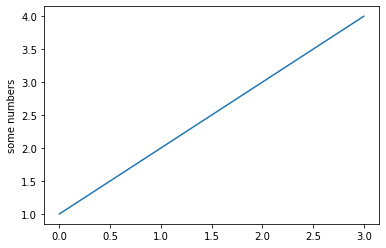

In [9]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [1]:
import numpy as np
import networkx as nx
import time
from model import Model
from network_visualisation import draw
import pickle
import pandas as pd
m = Model(perturbed_gene=10)

In [2]:
with open("cycles3.pkl", "rb") as f:
    cycles3 = pickle.load(f)

In [3]:
with open("cycles4.pkl", "rb") as f:
    cycles4 = pickle.load(f)

In [4]:
with open("cycles5.pkl", "rb") as f:
    cycles5 = pickle.load(f)

In [53]:
len(flat_list_5)
for i in flat_list_5:
    if i == []:
        print("lol")

In [54]:
len(flat_list_5)

13408321

In [51]:
flat_list_DAL5

[['AAC3', 'CTR1', 'FLO1', 'DAL5'],
 ['AAC3', 'CTR1', 'HXT7', 'DAL5'],
 ['AAC3', 'CTR1', 'PHO5', 'DAL5'],
 ['AAC3', 'TIP1', 'CIN5', 'DAL5'],
 ['AAC3', 'TIP1', 'YGP1', 'DAL5'],
 ['AAH1', 'ADH2', 'SNZ1', 'DAL5'],
 ['AAH1', 'ADH2', 'SPG4', 'DAL5'],
 ['AAH1', 'ANB1', 'ASH1', 'DAL5'],
 ['AAH1', 'ANB1', 'BAS1', 'DAL5'],
 ['AAH1', 'ANB1', 'CUP2', 'DAL5'],
 ['AAH1', 'ANB1', 'LYS9', 'DAL5'],
 ['AAH1', 'ANB1', 'PDH1', 'DAL5'],
 ['AAH1', 'ANB1', 'PHO5', 'DAL5'],
 ['AAH1', 'ANB1', 'RPN4', 'DAL5'],
 ['AAH1', 'ANB1', 'YAP1', 'DAL5'],
 ['AAH1', 'ANB1', 'YHI9', 'DAL5'],
 ['AAH1', 'ARG1', 'BAS1', 'DAL5'],
 ['AAH1', 'ARG1', 'CBF1', 'DAL5'],
 ['AAH1', 'ARG1', 'CUP2', 'DAL5'],
 ['AAH1', 'ARG1', 'FLO1', 'DAL5'],
 ['AAH1', 'ARG1', 'GNP1', 'DAL5'],
 ['AAH1', 'ARG1', 'HSP12', 'DAL5'],
 ['AAH1', 'ARG1', 'PDH1', 'DAL5'],
 ['AAH1', 'ARG1', 'RTG3', 'DAL5'],
 ['AAH1', 'ARG1', 'SNZ1', 'DAL5'],
 ['AAH1', 'ARG1', 'TEA1', 'DAL5'],
 ['AAH1', 'ARG1', 'UGA1', 'DAL5'],
 ['AAH1', 'ARG1', 'URE2', 'DAL5'],
 ['AAH1', 'ARG1', '

In [44]:
with open("cycles3_DAL5.pkl", "rb") as f:
    cyclesDAL5 = pickle.load(f)

rankDAL5 = rank_cycles(cyclesDAL5)

In [59]:
np.mean(rank5)

KeyboardInterrupt: 

In [45]:
flat_list_DAL5 = [item for sublist in cyclesDAL5 for item in sublist]
for i in rankDAL5[0:10]:
    print(flat_list_DAL5[i[1]])

['UGA1', 'DAL5']
['DAL81', 'DAL5']
['YGL117W', 'DAL5']
['TEA1', 'DAL5']
['PDH1', 'DAL5']
['UME6', 'DAL5']
['GDH2', 'UGA1', 'DAL5']
['MEP2', 'UGA1', 'DAL5']
['HAA1', 'DAL5']
['VHR1', 'DAL5']


In [94]:
np.mean(list(nx.get_edge_attributes(m.graph, "alpha").values()))

5.9396546427274093e-05

In [95]:
def rank_cycles(loops):
    flat_list = [item for sublist in loops for item in sublist]
    scores = []
    normalization = np.mean(list(nx.get_edge_attributes(m.graph, "alpha").values()))
    for idx, sublist in enumerate(flat_list):
        # score measures the strength of the loop
        score = 1
        previous = sublist[-1]
        for node in sublist:
            score = score * m.graph.get_edge_data(previous, node, default = 0)['alpha'] / normalization
            previous = node
        scores.append([score, idx])
    scores.sort(reverse=True, key= lambda x: abs(x[0]))
    return scores

In [96]:
rank3 = rank_cycles(cycles3)

In [97]:
rank3[0][1]

3915

In [98]:
flat_list_3 = [item for sublist in cycles3 for item in sublist]
for i in rank3[0:10]:
    print(flat_list_3[i[1]])

['PIR1', 'HO', 'PCL5', 'SWI5']
['PIR1', 'REE1', 'PCL5', 'SWI5']
['HXT2', 'CPA2', 'PCL5', 'SWI5']
['PST1', 'REE1', 'PCL5', 'SWI5']
['AIM44', 'REE1', 'PCL5', 'SWI5']
['FRE1', 'REE1', 'PCL5', 'SWI5']
['ASH1', 'HBN1', 'PCL5', 'SWI5']
['CTR1', 'REE1', 'PCL5', 'SWI5']
['YJL218W', 'REE1', 'PCL5', 'SWI5']
['HXT2', 'YGL117W', 'PCL5', 'SWI5']


In [99]:
rank4 = rank_cycles(cycles4)
rank4[0:30]

[[-131399664.56540495, 201247],
 [-15022126.84445149, 264773],
 [-6284290.813254106, 144544],
 [-5306008.752251154, 262988],
 [4804171.391524613, 3750],
 [-3852955.734485752, 109448],
 [3086157.993008291, 122296],
 [-2655720.5916856807, 264667],
 [1701694.1025713908, 99378],
 [-1408774.1185956497, 262833],
 [-1355244.4518262395, 200167],
 [-1230216.103220594, 200345],
 [1166191.0891492355, 200390],
 [-1117674.4854349003, 141034],
 [1080710.979976803, 140317],
 [-984489.7589308594, 20592],
 [-851739.0977014304, 200407],
 [795147.250287567, 200111],
 [-792324.2967366601, 200409],
 [-766871.6651253647, 120322],
 [712519.0154073008, 142317],
 [-699446.4597090073, 18979],
 [-697913.1816277396, 47840],
 [640808.0706329179, 233582],
 [-549822.1662193675, 141051],
 [-546717.1703076344, 258957],
 [539843.3935902895, 201229],
 [-449402.80875665677, 19762],
 [-428299.43165599974, 139122],
 [413722.61389973474, 138669]]

In [100]:
histogram_ = [item[0] for item in rank4]
histogram_[0:30]

[-131399664.56540495,
 -15022126.84445149,
 -6284290.813254106,
 -5306008.752251154,
 4804171.391524613,
 -3852955.734485752,
 3086157.993008291,
 -2655720.5916856807,
 1701694.1025713908,
 -1408774.1185956497,
 -1355244.4518262395,
 -1230216.103220594,
 1166191.0891492355,
 -1117674.4854349003,
 1080710.979976803,
 -984489.7589308594,
 -851739.0977014304,
 795147.250287567,
 -792324.2967366601,
 -766871.6651253647,
 712519.0154073008,
 -699446.4597090073,
 -697913.1816277396,
 640808.0706329179,
 -549822.1662193675,
 -546717.1703076344,
 539843.3935902895,
 -449402.80875665677,
 -428299.43165599974,
 413722.61389973474]

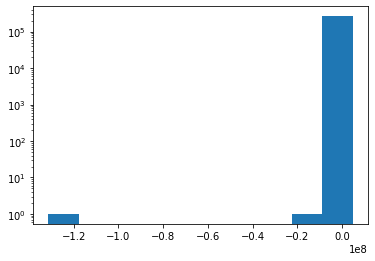

In [101]:
histogram_ = [item[0] for item in rank4]
histogram_[0:30]

import matplotlib.pyplot as plt
plt.hist(histogram_)
plt.yscale('log')
plt.show()

In [102]:
flat_list_4 = [item for sublist in cycles4 for item in sublist]

In [103]:
for i in rank4[0:30]:
    print(flat_list_4[i[1]])

['PRP9', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['YNL046W', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['HXT2', 'YGL117W', 'CPA2', 'PCL5', 'SWI5']
['YJL218W', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['AIM44', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['FRE1', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['FUS1', 'YGL117W', 'CPA2', 'PCL5', 'SWI5']
['YMR122W-A', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['FIG2', 'SAG1', 'CPA2', 'PCL5', 'SWI5']
['YJL043W', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['PIR1', 'FRE1', 'REE1', 'PCL5', 'SWI5']
['PIR1', 'REE1', 'FRE1', 'PCL5', 'SWI5']
['PIR1', 'SUR2', 'ANB1', 'PCL5', 'SWI5']
['HXT2', 'FRE1', 'REE1', 'PCL5', 'SWI5']
['HXT2', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['ASH1', 'HXT2', 'CPA2', 'PCL5', 'SWI5']
['PIR1', 'SUR2', 'IDH1', 'PCL5', 'SWI5']
['PIR1', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['PIR1', 'SUR2', 'REE1', 'PCL5', 'SWI5']
['FUS1', 'SAG1', 'CPA2', 'PCL5', 'SWI5']
['HXT2', 'PHM6', 'CPA2', 'PCL5', 'SWI5']
['ASH1', 'ASN1', 'CPA2', 'PCL5', 'SWI5']
['CUP1-1', 'CTR1', 'REE1', 'PCL5', 'SWI5']
['SPO16', 'NRK1', 'CPA2', 'PCL5', 

In [104]:
rank5 = rank_cycles(cycles5)

In [105]:
rank5

[[-1909683955.174157, 11788817],
 [-1139571334.0045748, 9759184],
 [-586152944.7295196, 11762360],
 [585080682.6571708, 7693677],
 [583964473.2960624, 11788814],
 [-501690412.1355824, 11788432],
 [-483402230.5008584, 10422886],
 [-460851660.7124541, 9861005],
 [-405752735.69235194, 6221169],
 [-268209697.4364079, 11769220],
 [-234599801.4982837, 7697658],
 [-218322586.3043252, 13217120],
 [212914181.74292123, 11788474],
 [-208902394.7302959, 11769399],
 [-205327080.57193184, 6238691],
 [-164776120.39939705, 11768950],
 [-155770927.89645526, 7680213],
 [-145070995.06137928, 11767658],
 [-131399664.56540494, 11788820],
 [119744822.44246522, 4435725],
 [118025744.30242257, 11930514],
 [108351478.63676575, 13387531],
 [-104224055.80927916, 11788813],
 [-96676163.05718027, 5445331],
 [89037039.8847308, 11930509],
 [88042164.80400388, 11788779],
 [83986689.01294853, 11930508],
 [79112253.17327386, 7726462],
 [-77114350.43385528, 13178518],
 [-75583088.93594077, 11788303],
 [-75091976.0875506

In [106]:
flat_list_5 = [item for sublist in cycles5 for item in sublist]

In [107]:
for i in rank5[0:30]:
    print(flat_list_5[i[1]])

['SWI5', 'PRP9', 'CTR1', 'REE1', 'FRE1', 'PCL5']
['SWI5', 'FRE1', 'PRP9', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'PIR1', 'FRE1', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'ASH1', 'GND1', 'YEF1', 'YJR061W', 'PCL5']
['SWI5', 'PRP9', 'CTR1', 'REE1', 'CUP9', 'PCL5']
['SWI5', 'PRP9', 'CTR1', 'HMX1', 'CPA2', 'PCL5']
['SWI5', 'HXT2', 'FRE1', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'FUS1', 'FIG2', 'SAG1', 'CPA2', 'PCL5']
['SWI5', 'PRP9', 'CTR1', 'REE1', 'LPX1', 'FKH1']
['SWI5', 'PIR1', 'SUR2', 'IDH1', 'CPA2', 'PCL5']
['SWI5', 'ASH1', 'HXT2', 'YGL117W', 'CPA2', 'PCL5']
['SWI5', 'YNL046W', 'CTR1', 'REE1', 'FRE1', 'PCL5']
['SWI5', 'PRP9', 'CTR1', 'HXT6', 'CPA2', 'PCL5']
['SWI5', 'PIR1', 'SUR2', 'RNR3', 'CPA2', 'PCL5']
['SWI5', 'REE1', 'PRP9', 'CTR1', 'LPX1', 'FKH1']
['SWI5', 'PIR1', 'SUR2', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'ASH1', 'DUR3', 'DUR1,2', 'CPA2', 'PCL5']
['SWI5', 'PIR1', 'REE1', 'CUP9', 'CPA2', 'PCL5']
['SWI5', 'PRP9', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'PRP9', 'CTR1', 'REE1', 'CUP9', 'DSE1']
['SWI5', 'REE1', 

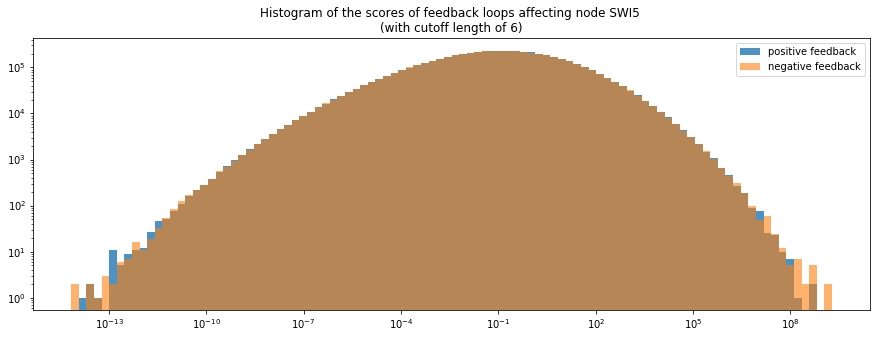

In [109]:
import math
import matplotlib.pyplot as plt

data = [item[0] for item in rank5]
data_neg = []
data_pos = []
for score in data:
    if score > 0:
        data_pos.append(score)
    if score < 0:
        data_neg.append(abs(score))

plt.figure(figsize=(15,5))
hist, bins = np.histogram(data_pos+data_neg, bins=100)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data_pos, bins=logbins, alpha=0.8)
plt.hist(data_neg, bins=logbins, alpha=0.6)
plt.legend(["positive feedback", "negative feedback"])
plt.yscale('log')
plt.xscale('log')
plt.title("Histogram of the scores of feedback loops affecting node SWI5 \n(with cutoff length of 6)")
plt.savefig("histogram.png", dpi=300)
plt.show()

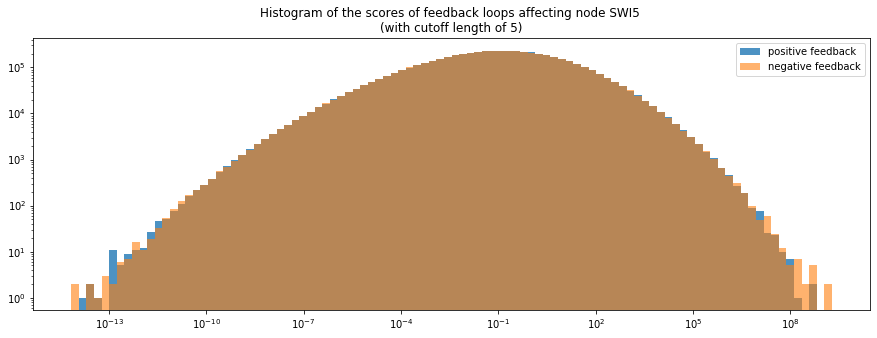

In [108]:
import math
import matplotlib.pyplot as plt

data = [item[0] for item in rank5]
data_neg = []
data_pos = []
for score in data:
    if score > 0:
        data_pos.append(score)
    if score < 0:
        data_neg.append(abs(score))

plt.figure(figsize=(15,5))
hist, bins = np.histogram(data_pos+data_neg, bins=100)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data_pos, bins=logbins, alpha=0.8)
plt.hist(data_neg, bins=logbins, alpha=0.6)
plt.legend(["positive feedback", "negative feedback"])
plt.yscale('log')
plt.xscale('log')
plt.title("Histogram of the scores of feedback loops affecting node SWI5 \n(with cutoff length of 6)")
plt.savefig("histogram.png", dpi=300)
plt.show()

In [12]:
for i in rank5[0:30]:
    print(flat_list_5[i[1]])

['SWI5', 'DAL5']
['SWI5', 'ASH1', 'PCL5']
['SWI5', 'REE1', 'PCL5']
['SWI5', 'HO', 'PCL5']
['SWI5', 'CPA2', 'PCL5']
['SWI5', 'ASH1', 'DAL5']
['SWI5', 'SNZ1', 'CBF1']
['SWI5', 'CRC1', 'PCL5']
['SWI5', 'ALT1', 'PCL5']
['SWI5', 'RME1', 'PCL5']
['SWI5', 'IDH1', 'PCL5']
['SWI5', 'PIR1', 'HO', 'PCL5']
['SWI5', 'ANB1', 'PCL5']
['SWI5', 'OSW2', 'PCL5']
['SWI5', 'YLL053C', 'PCL5']
['SWI5', 'PIR1', 'REE1', 'PCL5']
['SWI5', 'HBN1', 'PCL5']
['SWI5', 'FRE1', 'PCL5']
['SWI5', 'RME1', 'ECM22']
['SWI5', 'PBI1', 'ECM22']
['SWI5', 'FUS1', 'PCL5']
['SWI5', 'PBI1', 'FKH1']
['SWI5', 'HXT2', 'CPA2', 'PCL5']
['SWI5', 'GDH2', 'PCL5']
['SWI5', 'REG2', 'PCL5']
['SWI5', 'DAL80', 'PCL5']
['SWI5', 'DUR1,2', 'PCL5']
['SWI5', 'SAG1', 'PCL5']
['SWI5', 'MET31', 'PCL5']
['SWI5', 'CWP1', 'PCL5']


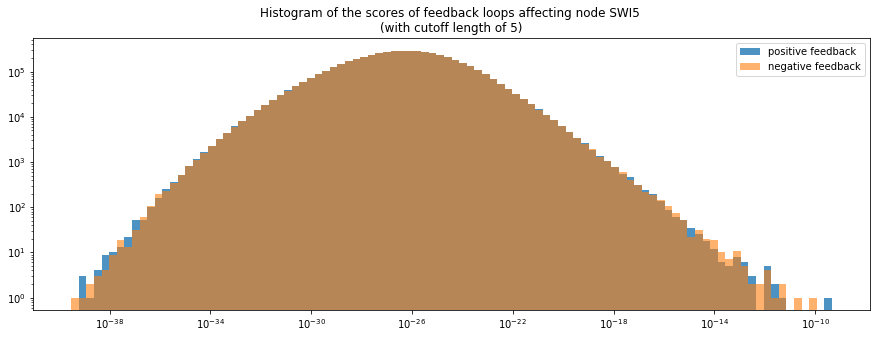

In [48]:
import math
import matplotlib.pyplot as plt

data = [item[0] for item in rank5]
data_neg = []
data_pos = []
for score in data:
    if score > 0:
        data_pos.append(score)
    if score < 0:
        data_neg.append(abs(score))

plt.figure(figsize=(15,5))
hist, bins = np.histogram(data_pos+data_neg, bins=100)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data_pos, bins=logbins, alpha=0.8)
plt.hist(data_neg, bins=logbins, alpha=0.6)
plt.legend(["positive feedback", "negative feedback"])
plt.yscale('log')
plt.xscale('log')
plt.title("Histogram of the scores of feedback loops affecting node SWI5 \n(with cutoff length of 5)")
plt.savefig("hitogram.png", dpi=300)
plt.show()